# LAB 2 : User similarity, Item Similarity 

* Dataset: https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations
* Objective: To use similarity index (jaccard similarity and cosine similarity) and distance (euclidean distance) to find user similarity and item similarity 
* Libraries : Pandas, Scipy, Numpy
* Use 'transactions_train.csv' to find user similarity and use 'articles.csv' to find item similarity

## User Similarity

### Read dataset for find user similarity

In [1]:
# import essential library
import pandas as pd
from scipy.spatial import distance
import numpy as np
import os
from tqdm import tqdm

In [2]:
# read dataset for find user similarity
transactionsFile_path = os.getcwd() + "/transactions_train.csv"
transactions_df = pd.read_csv(transactionsFile_path)

In [3]:
# check transactions dataframe
transactions_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [4]:
# select some data fromtransactions_df
selectedDataUser_df = transactions_df[["customer_id", "article_id"]]

In [5]:
# check selectedDataUser dataframe
selectedDataUser_df.head()

,customer_id,article_id
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004


In [6]:
# find unique userId
print(f"unique customer_id : {len(pd.unique(selectedDataUser_df['customer_id']))}")
# find unique movieId
print(f"unique article_id : {len(pd.unique(selectedDataUser_df['article_id']))}")

unique customer_id : 1362281
unique article_id : 104547


### Select data from customer that have more than 500 transactions only

In [7]:
# select index from customer that have more than 500 transactions only
countTransactions_series = selectedDataUser_df["customer_id"].value_counts()
indexCustomer_idx = countTransactions_series[countTransactions_series > 500].index

In [8]:
# check indexCustomer
indexCustomer_idx.values

array(['be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b',
       'b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71',
       '49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f',
       'a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc',
       'cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6',
       '55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d',
       'c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa',
       '8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076',
       '03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296',
       '6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55',
       'e34f8aa5e7c8c258523ea3e5f5f13168b6c21a9e8bffccd515dd5cef56126efb',
       '3493c55a7fe252c84a9a03db338f5be7afbce1edbca12f3a908fac9b983692f2',
       '0bf4c6fd4e9d33f9bfb807bb78348cbf5c565846ff4006acf5c1b9aea77b0e54',
       'e6498c7514c61d3c2

In [9]:
# drop data from same customer and same article
dropDuplicateData_df = selectedDataUser_df.drop_duplicates().reset_index()[
    ["customer_id", "article_id"]
]
dropDuplicateData_df["count"] = pd.Series(
    [1 for x in range(len(dropDuplicateData_df.index))]
)

In [10]:
# check dropDuplicateData dataframe
dropDuplicateData_df.head()

,customer_id,article_id,count
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,1
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,1
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,1
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,1
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,1


In [12]:
# select data from customer that have more than 500 transactions only
customerPurchased_df = pd.DataFrame()
for i in tqdm(indexCustomer_idx):
    customerPurchased_df = pd.concat(
        [
            customerPurchased_df,
            dropDuplicateData_df[dropDuplicateData_df["customer_id"] == i],
        ],
        ignore_index=True,
    )

  0%|          | 0/474 [00:00<?, ?it/s]

100%|██████████| 474/474 [14:04<00:00,  1.78s/it]


In [13]:
# check customerPurchased dataframe
customerPurchased_df.head()

,customer_id,article_id,count
0,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,658506001,1
1,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,662980002,1
2,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,667709001,1
3,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,685687001,1
4,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,478549001,1


In [14]:
# find unique userId
print(f"unique customer_id : {len(pd.unique(customerPurchased_df['customer_id']))}")
# find unique movieId
print(f"unique article_id : {len(pd.unique(customerPurchased_df['article_id']))}")

unique customer_id : 474
unique article_id : 50446


### Pivot table
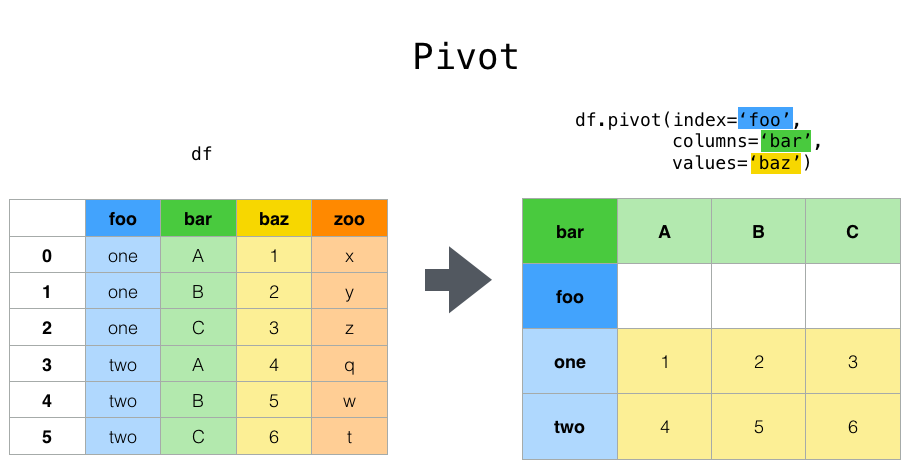

In [15]:
# pivot the data from customerPurchased_df
pivotedData_df = customerPurchased_df.pivot_table(
    index="customer_id", columns="article_id", values="count"
)
pivotedData_df.fillna(0, inplace=True)

In [16]:
# check pivotedData dataframe
pivotedData_df.head()

article_id,108775015,108775044,110065001,110065002,110065011,111565001,111586001,111593001,111609001,114428030,...,946763001,946764003,946795001,946827002,947509001,947934001,949551001,949551002,952267001,956217002
customer_id,,,,,,,,,,,,,,,,,,,,,
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00357b192b81fc83261a45be87f5f3d59112db7d117513c1e908e6a7021edc35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00eebac2c2e37626461e74e8395711964c4e01a7afa64337d020436c9dcb9f3d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0152d53f51444891ea07013fd1fb8325415bb09bb6798a59359b21a8326d801b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01661bad253b21353092eaf49836913843e1fc0554a6745d865c14ac2659660a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Find user similarity from selected data

In [17]:
# find similarity all customer that have more than 500 transactions
rangeUser_int = pivotedData_df.shape[0]
jaccardUser_int = np.zeros((rangeUser_int, rangeUser_int))
cosineUser_int = np.zeros((rangeUser_int, rangeUser_int))
euclideanUser_int = np.zeros((rangeUser_int, rangeUser_int))
euclideanUser_int[:] = -1
for i in tqdm(range(rangeUser_int)):
    for j in range(rangeUser_int):
        if i < j:
            jaccardUser_int[i, j] = 1 - distance.jaccard(
                pivotedData_df.iloc[i, :].to_numpy().flatten(),
                pivotedData_df.iloc[j, :].to_numpy().flatten(),
            )
            cosineUser_int[i, j] = 1 - distance.cosine(
                pivotedData_df.iloc[i, :].to_numpy().flatten(),
                pivotedData_df.iloc[j, :].to_numpy().flatten(),
            )
            euclideanUser_int[i, j] = distance.euclidean(
                pivotedData_df.iloc[i, :].to_numpy().flatten(),
                pivotedData_df.iloc[j, :].to_numpy().flatten(),
            )

  0%|          | 0/474 [00:00<?, ?it/s]

100%|██████████| 474/474 [08:47<00:00,  1.11s/it]


In [32]:
# find the most similar customer with jaccard similarity
idxJaccardUser_x, idxJaccardUser_y = np.where(jaccardUser_int == jaccardUser_int.max())
print(f"max jaccard similarity: {jaccardUser_int.max()}")
print(
    f"customer_id: {pivotedData_df.iloc[idxJaccardUser_x].index.values} and {pivotedData_df.iloc[idxJaccardUser_y].index.values}"
)

max jaccard similarity: 0.14264705882352946
customer_id: ['4fd20fa4ccc486b89c4325446c5b9db1514498a03f9da3f9e3e45aa20c18d117'] and ['a9f57e2cc46cd78cf82c2d6dc0a8154329b44e933c0e2cc072543efbd5346be5']


In [33]:
# find the most similar customer with cosine similarity
idxCosineUser_x, idxCosineUser_y = np.where(cosineUser_int == cosineUser_int.max())
print(f"max cosine similarity: {cosineUser_int.max()}")
print(
    f"customer_id: {pivotedData_df.iloc[idxCosineUser_x].index.values} and {pivotedData_df.iloc[idxCosineUser_y].index.values}"
)

max cosine similarity: 0.25140841467384645
customer_id: ['4fd20fa4ccc486b89c4325446c5b9db1514498a03f9da3f9e3e45aa20c18d117'] and ['a9f57e2cc46cd78cf82c2d6dc0a8154329b44e933c0e2cc072543efbd5346be5']


In [53]:
# find the most similar customer with euclidean distance
euclideanUser_int[euclideanUser_int == -1] = euclideanUser_int.max()
idxEuclideanUser_x, idxEuclideanUser_y = np.where(
    euclideanUser_int == euclideanUser_int.min()
)
print(f"min euclidean distance: {euclideanUser_int.min()}")
print(
    f"customer_id: {pivotedData_df.iloc[idxEuclideanUser_x].index.values} and {pivotedData_df.iloc[idxEuclideanUser_y].index.values}"
)

min euclidean distance: 12.609520212918492
customer_id: ['9d50687e366b49577c136952613632b9f157cb9051cb71950714c7ba92ad6d56'] and ['c6e14fffa49db6ba1f4f95a985d4b5a1ca5e6b3611fed5de9b77d201c4ba20b8']


## Item Similality


### Read dataset for find item similarity

In [54]:
# read dataset for find item similarity
articles_path = os.getcwd() + "/articles.csv"
articles_df = pd.read_csv(articles_path)

In [55]:
# check articles dataframe
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [56]:
# find unique article_id
print(f"unique article_id : {len(pd.unique(articles_df['article_id']))}")

unique article_id : 105542


### Select feature from dataset

In [57]:
# select only integer data from articles dataframe
selectedDataArticle_df = articles_df[
    [
        "product_code",
        "product_type_no",
        "graphical_appearance_no",
        "colour_group_code",
        "index_group_no",
        "section_no",
        "garment_group_no",
    ]
]

In [58]:
# check selectedDataArticle dataframe
selectedDataArticle_df.head()

,product_code,product_type_no,graphical_appearance_no,colour_group_code,index_group_no,section_no,garment_group_no
0,108775,253,1010016,9,1,16,1002
1,108775,253,1010016,10,1,16,1002
2,108775,253,1010017,11,1,16,1002
3,110065,306,1010016,9,1,61,1017
4,110065,306,1010016,10,1,61,1017


### Find item similarity with the first 500 articles 

In [59]:
# find similarity for first 500 articles
rangeArticle_int = 500
jaccardArticle_int = np.zeros((rangeArticle_int, rangeArticle_int))
cosineArticle_int = np.zeros((rangeArticle_int, rangeArticle_int))
euclideanArticle_int = np.zeros((rangeArticle_int, rangeArticle_int))
euclideanArticle_int[:] = -1
for i in tqdm(range(rangeArticle_int)):
    for j in range(rangeArticle_int):
        if i < j:
            jaccardArticle_int[i, j] = 1 - distance.jaccard(
                selectedDataArticle_df.iloc[i, :].to_numpy().flatten(),
                selectedDataArticle_df.iloc[j, :].to_numpy().flatten(),
            )
            cosineArticle_int[i, j] = 1 - distance.cosine(
                selectedDataArticle_df.iloc[i, :].to_numpy().flatten(),
                selectedDataArticle_df.iloc[j, :].to_numpy().flatten(),
            )
            euclideanArticle_int[i, j] = distance.euclidean(
                selectedDataArticle_df.iloc[i, :].to_numpy().flatten(),
                selectedDataArticle_df.iloc[j, :].to_numpy().flatten(),
            )

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [01:09<00:00,  7.24it/s]


In [60]:
# find the most similar article with jaccard similarity
idxJaccardItem_x, idxJaccardItem_y = np.where(
    jaccardArticle_int == jaccardArticle_int.max()
)
print(f"max jaccard similarity: {jaccardArticle_int.max()}")
print(
    f"article_id: {articles_df['article_id'].iloc[idxJaccardItem_x].values} and {articles_df['article_id'].iloc[idxJaccardItem_y].values}"
)

max jaccard similarity: 1.0
article_id: [118458003 145872037 146706001 153115040 156610001 160442042 174057022
 174057022 174057027 174057028 176209025 176550016 179950001 186372042
 187949016 187949019 187949019 187949020 187949020 187949025 187949026
 187949028 189616006 189616006 189616006 189616006 189616006 189616006
 189616007 189616007 189616007 189616007 189616007 189616008 189616008
 189616008 189616008 189616014 189616014 189616014 189616015 189616015
 189616016 200761022 201219011 204892024 211143022 212629032 212629033
 212629035 212629036 214844004 215303002 217727002 219075017 220365002
 224606022 228257002 228257004 233091003 237347011 237347011 237347022
 237347024 237347039 237347045 237347055 241486015 243937025 247072018
 247072020 247072020 247072026 249136006 249136006 249136015 249136019
 249136019 249136019 249136020 249136020 249136022 249136025] and [118458029 145872053 146706004 153115043 156610007 160442043 174057028
 174057033 174057032 174057033 176209039 1

In [61]:
# find the most similar article with cosine similarity
idxCosineItem_x, idxCosineItem_y = np.where(
    cosineArticle_int == cosineArticle_int.max()
)
print(f"max cosine similarity: {cosineArticle_int.max()}")
print(
    f"article_id: {articles_df['article_id'].iloc[idxCosineItem_x].values} and {articles_df['article_id'].iloc[idxCosineItem_y].values}"
)

max cosine similarity: 1.0
article_id: [118458003 145872037 146706001 153115040 156610001 160442042 174057022
 174057022 174057027 174057028 176209025 176550016 179950001 186372042
 187949016 187949019 187949019 187949020 187949020 187949025 187949026
 187949028 189616006 189616006 189616006 189616006 189616006 189616006
 189616007 189616007 189616007 189616007 189616007 189616008 189616008
 189616008 189616008 189616014 189616014 189616014 189616015 189616015
 189616016 200761022 201219011 204892024 211143022 212629032 212629033
 212629035 212629036 214844004 215303002 217727002 219075017 220365002
 224606022 228257002 228257004 233091003 237347011 237347011 237347022
 237347024 237347039 237347045 237347055 241486015 243937025 247072018
 247072020 247072020 247072026 249136006 249136006 249136015 249136019
 249136019 249136019 249136020 249136020 249136022 249136025] and [118458029 145872053 146706004 153115043 156610007 160442043 174057028
 174057033 174057032 174057033 176209039 17

In [62]:
# find the most similar article with euclidean distance
euclideanArticle_int[euclideanArticle_int == -1] = euclideanArticle_int.max()
idxEuclideanItem_x, idxEuclideanItem_y = np.where(
    euclideanArticle_int == euclideanArticle_int.min()
)
print(f"min euclidean distance: {euclideanArticle_int.min()}")
print(
    f"article_id: {articles_df['article_id'].iloc[idxEuclideanItem_x].values} and {articles_df['article_id'].iloc[idxEuclideanItem_y].values}"
)

min euclidean distance: 0.0
article_id: [118458003 145872037 146706001 153115040 156610001 160442042 174057022
 174057022 174057027 174057028 176209025 176550016 179950001 186372042
 187949016 187949019 187949019 187949020 187949020 187949025 187949026
 187949028 189616006 189616006 189616006 189616006 189616006 189616006
 189616007 189616007 189616007 189616007 189616007 189616008 189616008
 189616008 189616008 189616014 189616014 189616014 189616015 189616015
 189616016 200761022 201219011 204892024 211143022 212629032 212629033
 212629035 212629036 214844004 215303002 217727002 219075017 220365002
 224606022 228257002 228257004 233091003 237347011 237347011 237347022
 237347024 237347039 237347045 237347055 241486015 243937025 247072018
 247072020 247072020 247072026 249136006 249136006 249136015 249136019
 249136019 249136019 249136020 249136020 249136022 249136025] and [118458029 145872053 146706004 153115043 156610007 160442043 174057028
 174057033 174057032 174057033 176209039 1